In [1]:
!pip install pandas
!pip install networkx
!pip install matplotlib
!pip install community
!pip install collections


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Step 1: Read the each csv file into the data frame and combine them
import pandas as pd
import os

# Directory containing your CSV files
directory = 'linkedin-data'

# List to store dataframes
dfs = []

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):  # Check if it's a CSV file
        file_path = os.path.join(directory, filename)  # Full path to the file
        df = pd.read_csv(file_path, skiprows=3)  # Read CSV into dataframe, skipping first three rows
        dfs.append(df)  # Append dataframe to list

# Concatenate all dataframes into one
combined_df = pd.concat(dfs, ignore_index=True)

# Now combined_df contains the data from all CSV files in the directory


In [3]:
combined_df

,First Name,Last Name,URL,Email Address,Company,Position,Connected On
0,Solomon,Wairegi,https://www.linkedin.com/in/solomon-wairegi,NaN,Pathways Technologies Limited,Data Scientist,21 Apr 2024
1,Peter,Simboni,https://www.linkedin.com/in/peter-simboni-97b9...,NaN,SMP FUNDAMENTALS,Founder,04 Apr 2024
2,Duke,Moseti,https://www.linkedin.com/in/duke-moseti-54614723a,NaN,The Mp Shah Hospital,Human Resources Director,04 Apr 2024
3,Weldeyesus,Ritho,https://www.linkedin.com/in/weldeyesus-ritho-9...,NaN,7² Algorithm,XO,04 Apr 2024
4,Peter,"Macharia, MBA, PMI-ACP®, PMP®",https://www.linkedin.com/in/peter-macharia-b62...,NaN,Infolaunch Africa,Project Management Trainer/ PMP Trainer /CAPM ...,04 Apr 2024
...,...,...,...,...,...,...,...
1561,Ryan,Koech,https://www.linkedin.com/in/ryan-koech-7ba340209,NaN,ur-drive,Software Developer,23 Feb 2023
1562,Purity,Jangaya,https://www.linkedin.com/in/purity-jangaya,NaN,Savannah Informatics,SRE Intern,23 Feb 2023
1563,Jesse,Mathiu,https://www.linkedin.com/in/jesse-mathiu-381a5...,NaN,NaN,NaN,20 Dec 2022
1564,Romano,Karanja,https://www.linkedin.com/in/romano-karanja-b95...,NaN,NaN,NaN,17 Sep 2022


In [4]:
combined_df.head(0)

,First Name,Last Name,URL,Email Address,Company,Position,Connected On


In [5]:
# Step 2: Create a directed graph
import networkx as nx

G = nx.DiGraph()

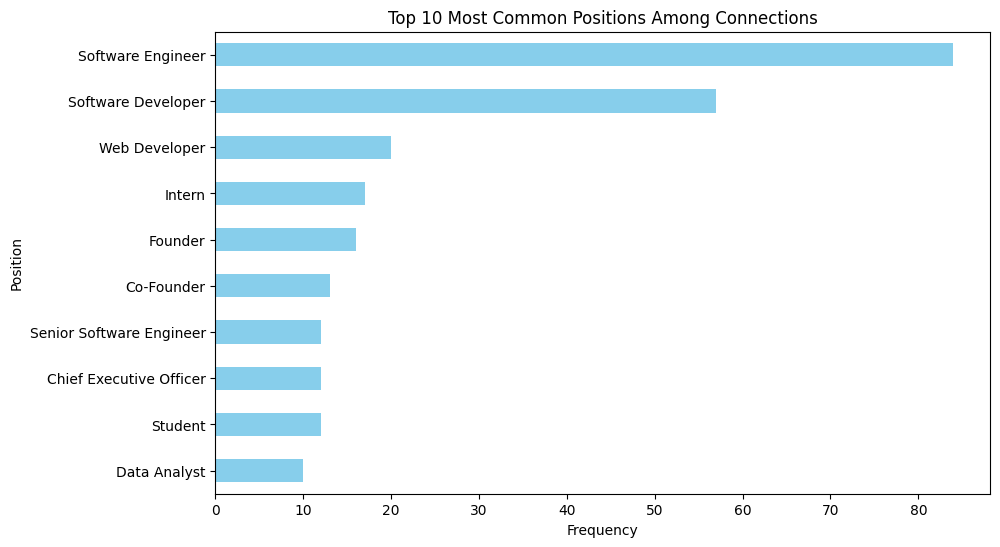

In [6]:
import matplotlib.pyplot as plt

# Plotting histogram of positions
plt.figure(figsize=(10, 6))
combined_df['Position'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Common Positions Among Connections')
plt.xlabel('Frequency')
plt.ylabel('Position')
plt.gca().invert_yaxis()  # Invert y-axis to have the most common position on top
plt.show()


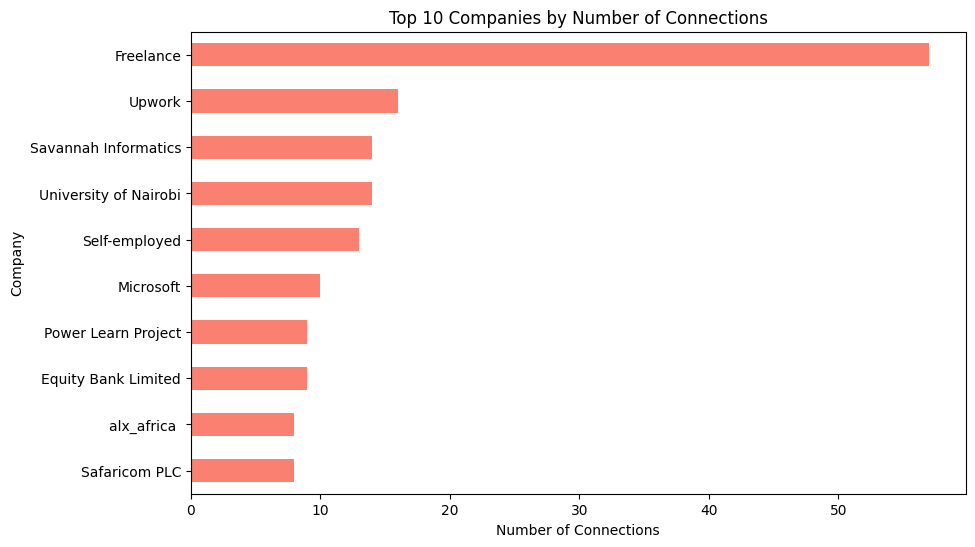

In [7]:
# Plotting top N companies by number of connections
top_n = 10  # Change this value to plot more or fewer companies
plt.figure(figsize=(10, 6))
combined_df['Company'].value_counts().head(top_n).plot(kind='barh', color='salmon')
plt.title(f'Top {top_n} Companies by Number of Connections')
plt.xlabel('Number of Connections')
plt.ylabel('Company')
plt.gca().invert_yaxis()  # Invert y-axis to have the company with the most connections on top
plt.show()


In [8]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Iterate over each row in the DataFrame and add edges to the graph
for index, row in combined_df.iterrows():
    # Handle NaN values in 'First Name' and 'Last Name' columns
    first_name = row['First Name'] if pd.notnull(row['First Name']) else ''
    last_name = row['Last Name'] if pd.notnull(row['Last Name']) else ''
    source = f"{first_name} {last_name}"
    target = row['Position']  # Assuming 'Position' represents the target
    G.add_edge(source, target)

# Compute centrality measures
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)
clustering_coefficient = nx.clustering(G)

# Print the results or perform further analysis
print("Closeness Centrality:")
for node, centrality in closeness_centrality.items():
    print(f"{node}: {centrality}")

print("\nEigenvector Centrality:")
for node, centrality in eigenvector_centrality.items():
    print(f"{node}: {centrality}")

print("\nClustering Coefficient:")
for node, coefficient in clustering_coefficient.items():
    print(f"{node}: {coefficient}")


Closeness Centrality:
Solomon Wairegi: 0.0
Data Scientist: 0.0042780748663101605
Peter Simboni: 0.0
Founder: 0.006417112299465241
Duke Moseti: 0.0
Human Resources Director: 0.0005347593582887701
Weldeyesus Ritho: 0.0
XO: 0.0005347593582887701
Peter  Macharia, MBA, PMI-ACP®, PMP®: 0.0
Project Management Trainer/ PMP Trainer /CAPM Trainer: 0.0005347593582887701
Warren Okumu: 0.0
Wordpress Developer: 0.0005347593582887701
Cavin Larry: 0.0
nan: 0.10748663101604278
John Jones: 0.0
Asia Kala : 0.0
Alvis Njenga: 0.0
Chief Executive Officer: 0.0058823529411764705
Tonny Ndare: 0.0
Brand Manager, Photographer and Videographer: 0.0005347593582887701
Richard Mjomba: 0.0
Assistant Marketing Manager: 0.0005347593582887701
Boniface Mbogho: 0.0
Software Engineer: 0.031016042780748664
Cosmas Philip: 0.0
Parking Attendant: 0.0005347593582887701
Hillary Omondi: 0.0
GDSC Co-Lead 23'/24': 0.0005347593582887701
Sheila Wanjiru: 0.0
Web3.0 Sales & Marketing Lead: 0.0005347593582887701
 Purity Jangaya: 0.0
SRE

In [9]:
!pip install scipy


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\Njihia\PyCharmProjects\Group5 Linkedin Connections\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 120288 (\N{MATHEMATICAL SANS-SERIF BOLD CAPITAL M}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Njihia\PyCharmProjects\Group5 Linkedin Connections\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 120280 (\N{MATHEMATICAL SANS-SERIF BOLD CAPITAL E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Njihia\PyCharmProjects\Group5 Linkedin Connections\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 120287 (\N{MATHEMATICAL SANS-SERIF BOLD CAPITAL L}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Njihia\PyCharmProjects\Group5 Linkedin Connections\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 120300 (\N{MATHEMATICAL SANS-SERIF BOLD CAPITAL Y}) missing from current font.
  fig.canvas.print

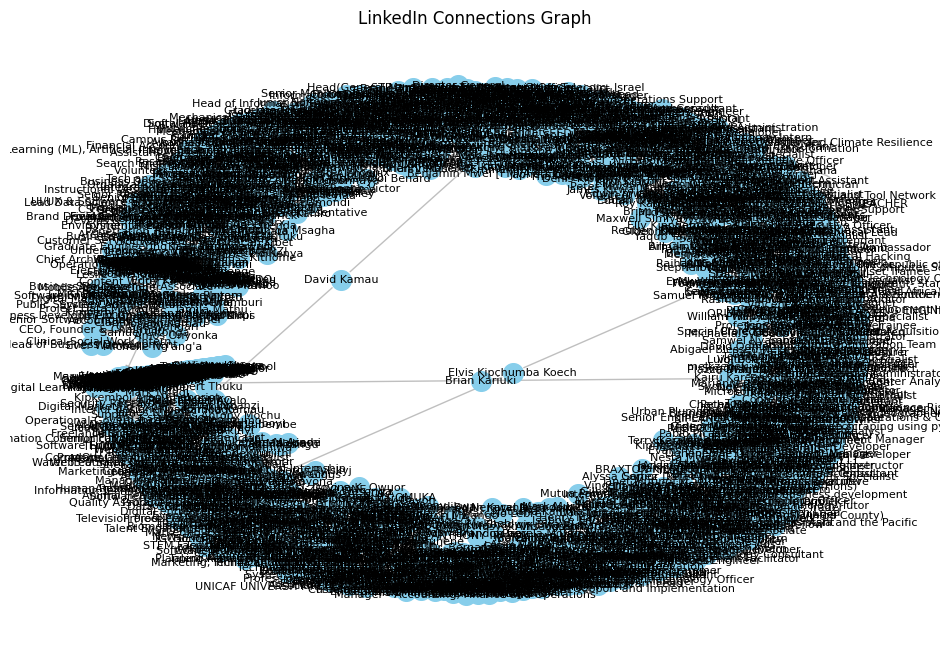

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Iterate over each row in the DataFrame and add edges to the graph
for index, row in combined_df.iterrows():
    # Handle NaN values in 'First Name' and 'Last Name' columns
    first_name = row['First Name'] if pd.notnull(row['First Name']) else ''
    last_name = row['Last Name'] if pd.notnull(row['Last Name']) else ''
    source = f"{first_name} {last_name}"
    target = row['Position']  # Assuming 'Position' represents the target
    G.add_edge(source, target)

# Compute centrality measures
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)
clustering_coefficient = nx.clustering(G)

# Set node positions
pos = nx.spring_layout(G, seed=42)  # Adjust the layout algorithm as needed

# Draw the graph
plt.figure(figsize=(12, 8))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=200, node_color='skyblue')

# Draw edges
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5, edge_color='gray')

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')

plt.title('LinkedIn Connections Graph')
plt.axis('off')
plt.show()


In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Iterate over each row in the DataFrame and add edges to the graph
for index, row in combined_df.iterrows():
    # Construct unique node labels and convert them to strings
    source = str(row['First Name']) + ' ' + str(row['Last Name'])
    target = str(row['Position'])  # Assuming 'Position' represents the target
    G.add_edge(source, target)

# Find communities using the Clauset-Newman-Moore greedy modularity maximization algorithm
communities = list(nx.algorithms.community.greedy_modularity_communities(G))

# Print the number of communities
print("Number of communities:", len(communities))

# Print the communities in a structured format
print("\nCommunities:")
for i, community in enumerate(communities):
    print(f"\nCommunity {i + 1}:")
    for j, member in enumerate(community):
        if j % 5 == 0:  # Print 5 members per line
            print("\t", end="")
        print(member, end="\n" if (j + 1) % 5 == 0 or j == len(community) - 1 else ", ")


Number of communities: 665

Communities:

Community 1:
	Sammy Appollo., Aurelia Jemutai, Mercy Musyoka, Christine  Nyaga, Geoffrey Kibiri
	Lawrence  Mwirigi, Victor Kinyua, Faith Wambui, Brian Kiprono, Njuguna Kelvin
	Billy Kisia, Robert Mumina, Kevin Bett, Romano Karanja, Muchira Kariuki
	Austine Omondi, Harrison Mwangi, Riunge Brian, Derrick  Mwangi , Stephen khachina
	Veronica Owich, Laurent Namasaka, Karl Maina, Sam Ongau, Bereket Kindie
	Korir Hillary, Sylvester Mwaringa, Margaret Karani, NICHOLAS OKELLO, suhaib ali
	Tony Kimutai, MarvintheCreator Mungai, Reuben Victor, Gladys Mungai, Bryan Onyango
	Amariah Kamau, Joel Wafula, Gucha Duncan, Ian Murunga, Delight David
	Wamae Ndiritu, James Nyamburi, The Kenyan Job Finder, Brian Wambugu, Mogeni Elvis
	Brian Kariuki, Kennedy Otieno, Mbugua Nganga, Susan Masaku, Martin Ndibaru
	nan, Faith Mumo, Bob Oyier, Suleiman Said, Sylvia Kisio
	Cheboi Millicent, nan nan, Vicsally Kariuki, Jerome Mberia, Juliet Musyoki
	harun mugu, Wafula Brevian

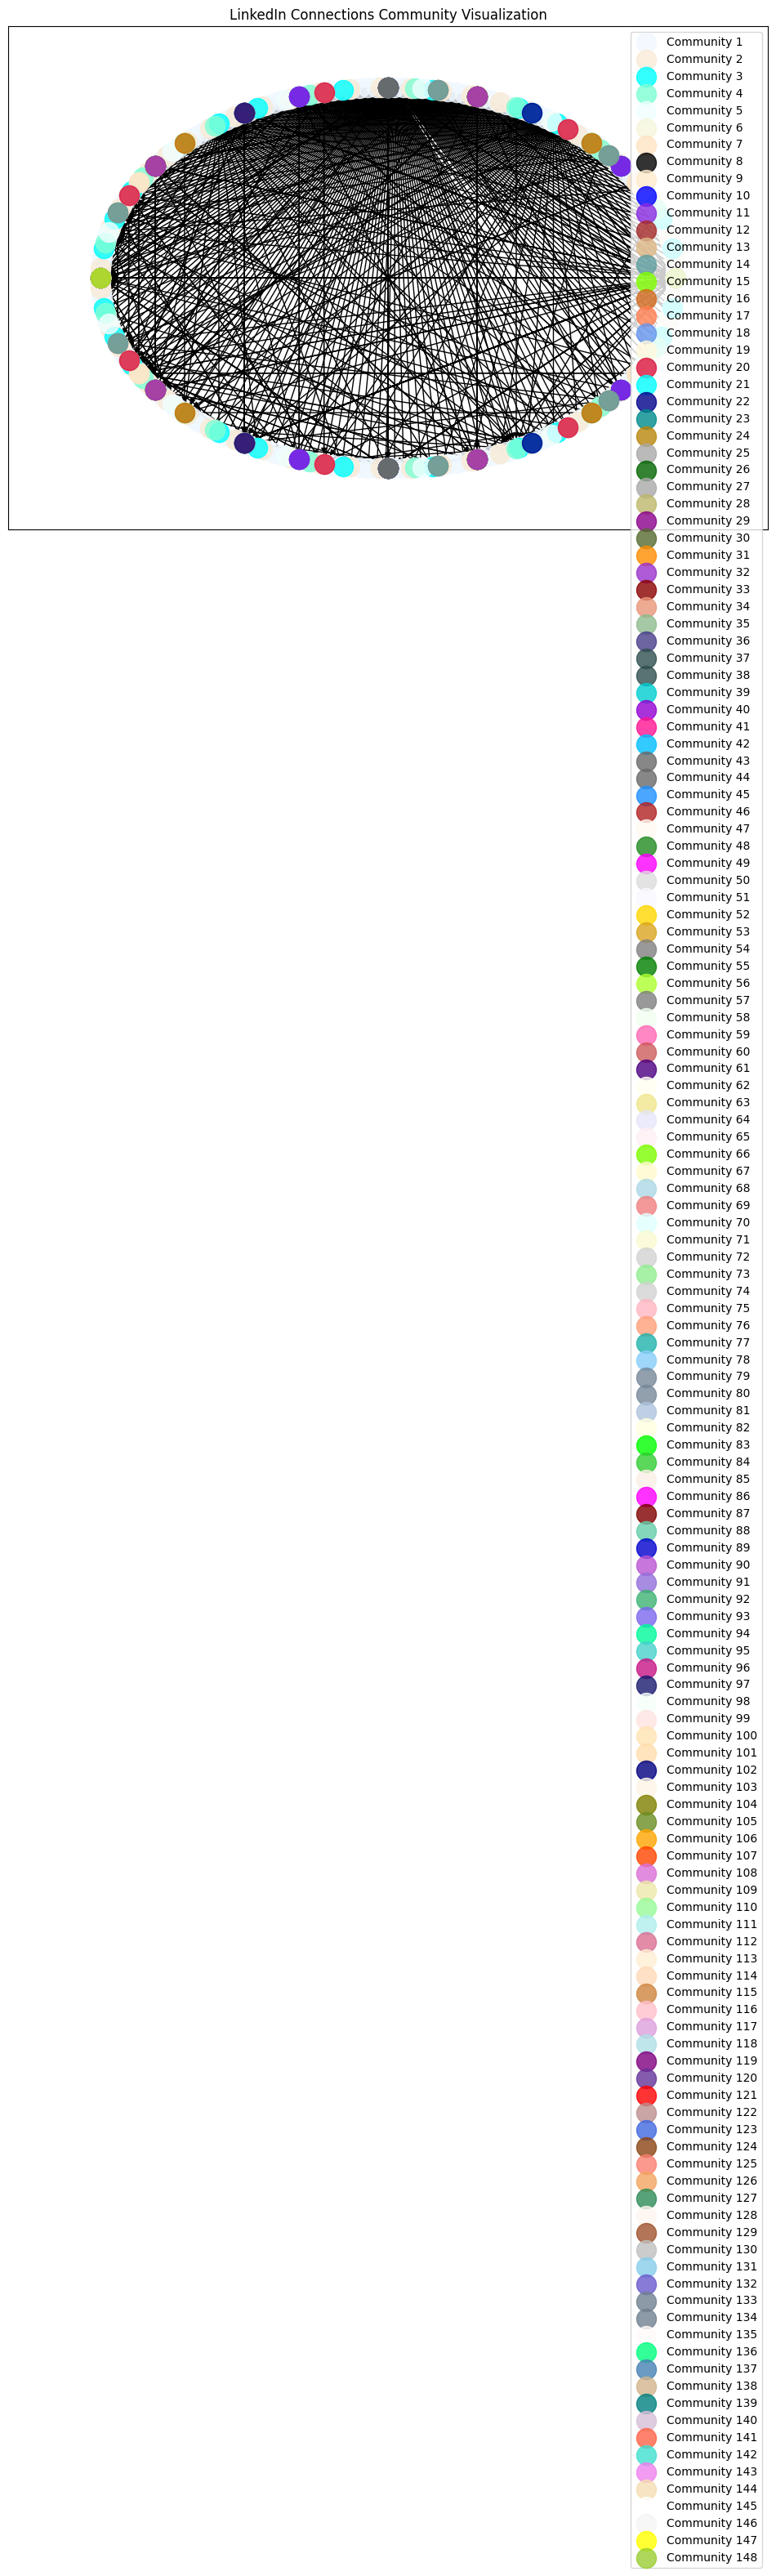

In [12]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.colors as mcolors

# Create a new figure
plt.figure(figsize=(12, 8))

# Generate a list of distinct colors for each community
num_communities = len(communities)
colors = list(mcolors.CSS4_COLORS.values())[:num_communities]

# Iterate over each community
for i, (community, color) in enumerate(zip(communities, colors), start=1):
    # Create a subgraph for the community
    community_graph = G.subgraph(community)
    
    # Set node positions using a circular layout for better separation
    pos = nx.circular_layout(community_graph)
    
    # Draw nodes with community-specific color
    nx.draw_networkx_nodes(community_graph, pos, node_color=color, node_size=300, alpha=0.8, label=f"Community {i}")

    # Filter edges to include only those within the current community
    edges_community = [(u, v) for u, v in community_graph.edges() if u in community and v in community]
    
    # Draw edges within the community
    nx.draw_networkx_edges(community_graph, pos, edgelist=edges_community)

# Add a title and legend
plt.title("LinkedIn Connections Community Visualization")
plt.legend(loc='upper right')

# Adjust plot margins
plt.margins(0.1)

# Display the plot
plt.show()


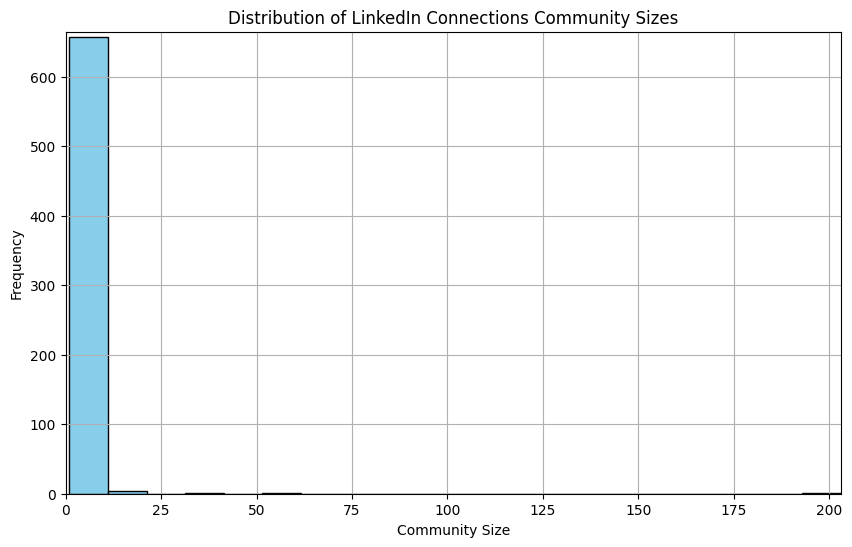

In [13]:
import matplotlib.pyplot as plt

# Assuming you have already detected communities and stored them in the variable 'communities'

# Calculate the sizes of all communities
community_sizes = [len(community) for community in communities]

# Create a histogram of community sizes with reduced scale on both axes
plt.figure(figsize=(10, 6))
plt.hist(community_sizes, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Community Size')
plt.ylabel('Frequency')
plt.title('Distribution of LinkedIn Connections Community Sizes')
plt.grid(True)

# Set limits for the x-axis and y-axis
plt.xlim(0, max(community_sizes))
plt.ylim(0, len(community_sizes))

plt.show()


In [14]:
# Assuming you have already detected communities and stored them in the variable 'communities'

# Iterate over each community
for i, community in enumerate(communities, start=1):
    print(f"Community {i} titles:")
    for member in community:
        titles = combined_df.loc[combined_df['First Name'] + ' ' + combined_df['Last Name'] == member, 'Position']
        print("\t", titles.values)


Community 1 titles:
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan nan nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan nan]
	 [nan]
	 [nan nan]
	 [nan]
	 [nan]
	 [nan nan]
	 [nan]
	 [nan nan]
	 [nan nan nan nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan nan nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan nan]
	 [nan]
	 [nan nan]
	 [nan]
	 [nan]
	 [nan 'Director']
	 [nan 'Senoir Sales lead Madison Group']
	 [nan]
	 [nan]
	 [nan]
	 []
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan nan nan]
	 []
	 [nan nan]
	 [nan]
	 [nan]
	 [nan nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan nan]
	 [nan nan nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan nan]
	 [nan]
	 [nan nan nan nan]
	 [nan]
	 [nan nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	

In [15]:
# Print each community and their members
for i, community_nodes in enumerate(communities):
    community_name = f"community_{i}"
    sorted_community = sorted(community_nodes)
    globals()[community_name] = sorted_community
    print(f'Community {i}: {sorted_community}')


Community 0: ['AYUSI PETER', 'Abdimalik Hassan', 'Abdullahi Abdi', 'Abigail Wachira', 'Alianda Kelvin', 'Allan Mutai', 'Alvin Yien', 'Amariah Kamau', 'Angela Mawia', 'Anuj .', 'Asia Kala ', 'Aurelia Jemutai', 'Austine Omondi', 'Banice Akoth', 'Bereket Kindie', 'Billy Kisia', 'Bob Oyier', 'Braison Orina', 'Branham Mwangi', 'Brian Kariuki', 'Brian Kimutai', 'Brian Kiprono', 'Brian Wambugu', 'Bryan Onyango', 'Captain Jeff,Godii', 'Cavin Larry', 'Chai shadrack', 'Cheboi Millicent', 'Christine  Nyaga', 'Clarence Kurere', 'Collin Mwenda', 'Cynthia Maina', 'Cynthia Ndiba', 'Daniel Ogada', 'David Gichuhi', 'Delight David', 'Dera Amollo', 'Derrick  Mwangi ', 'Derrick Muturi', 'Director', 'Dominic Mwasya', 'EVALYNE WAMBUI', 'Edina Kwamboka', 'Edwin Bett', 'Emily Colleran', 'Erick Mwangi', 'Esther Nambuye', 'Eston Brandon Kiama', 'Faith Chemutai', 'Faith Gacheri', 'Faith Mumo', 'Faith Tum', 'Faith Wambui', 'Felista Njeri', 'Frank Samn', 'Fredrick Omolo', 'Geoffrey Kibiri', 'Geoffrey Nyanyuki', 'G

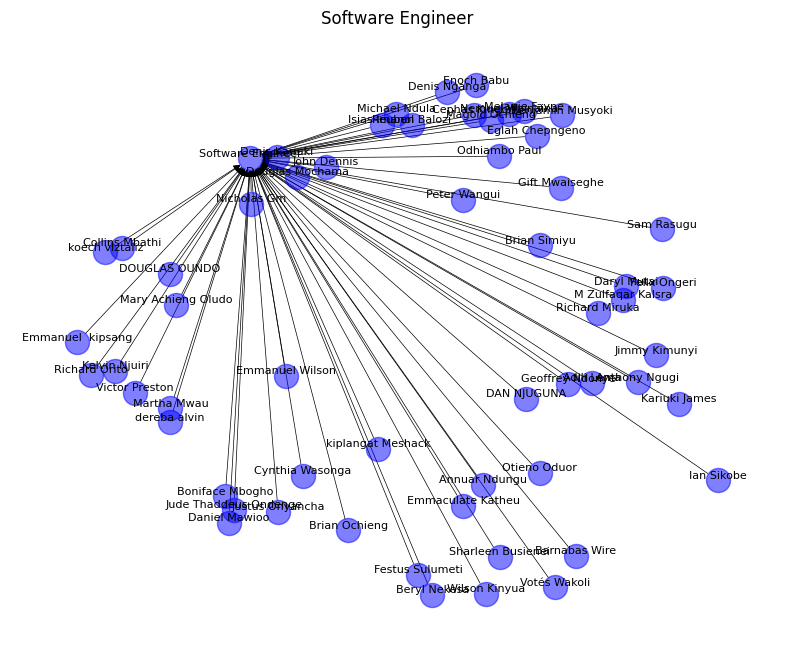

In [16]:
# Visualize Software Engineers in community_1 (Community 2)
import matplotlib.pyplot as plt
import networkx as nx

plt.figure(figsize=(10, 8))

# Compute node positions using spring layout
pos = nx.spring_layout(G, k=0.15)  # Adjust 'k' to control the spacing between nodes

# Draw nodes with larger size for better visibility
nx.draw_networkx_nodes(G, pos, nodelist=community_1, node_color='b', alpha=0.5, node_size=300)

# Filter edges to include only those within community_1
edges_1 = [(u, v) for u, v in G.edges() if u in community_1 and v in community_1]

# Draw edges with reduced width
nx.draw_networkx_edges(G, pos, edgelist=edges_1, width=0.5)

# Draw node labels with adjusted positions and font size
node_labels = {node: node for node in community_1}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8, font_color='black', verticalalignment='bottom')

plt.title('Software Engineer')
plt.axis('off')  # Turn off the axis
plt.show()


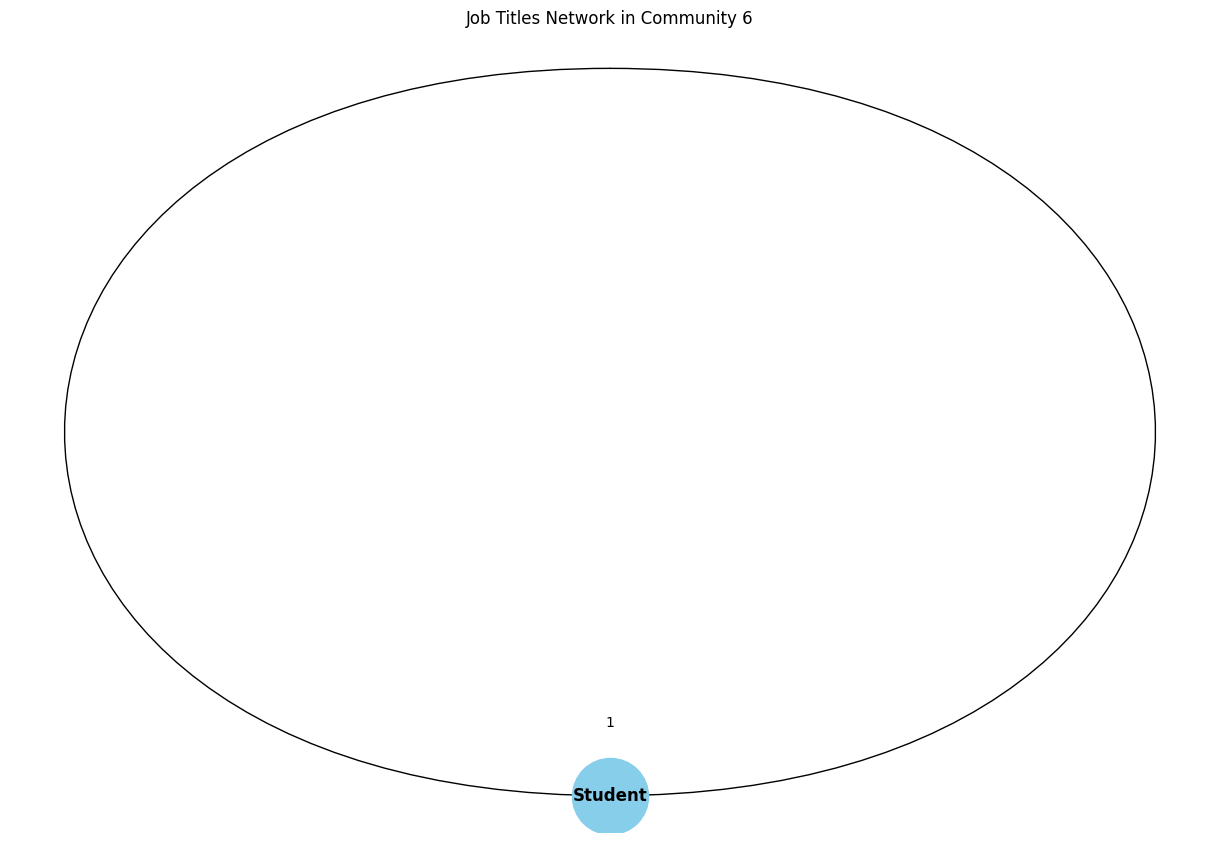

In [18]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

# Assuming you have already detected communities and stored them in the variable 'communities'
# Assuming you have a DataFrame containing member information named 'combined_df'

# Concatenate first name and last name to match the format in your code snippet
combined_df['Full Name'] = combined_df['First Name'] + ' ' + combined_df['Last Name']

# Extract job titles of members in Community 6
community_5_members = community_5
community_5_job_titles = combined_df[combined_df['Full Name'].isin(community_5_members)]['Position']

# Count the occurrences of each job title
job_title_counts = community_5_job_titles.value_counts()

# Create a graph
G = nx.Graph()

# Add nodes for each job title
for job_title, count in job_title_counts.items():
    G.add_node(job_title, count=count)

# Add edges between job titles that occur together in the same community
for member in community_5_members:
    titles = combined_df.loc[combined_df['Full Name'] == member, 'Position'].values
    for i in range(len(titles)):
        for j in range(i+1, len(titles)):
            title1 = titles[i]
            title2 = titles[j]
            if G.has_edge(title1, title2):
                G[title1][title2]['weight'] += 1
            else:
                G.add_edge(title1, title2, weight=1)


# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.15)  # Adjust 'k' to control the spacing between nodes
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=12, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Job Titles Network in Community 6')
plt.axis('off')
plt.show()
